# Advance Regression Assignment

**Problem Statement** <br>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:** <br>
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

# Data Understanding and Exploration

Let's first import the requiried libraries and have a look at the dataset and look at the size, attribute names etc.

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [353]:
import warnings
warnings.filterwarnings('ignore')

In [354]:
#Reading the dataset
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [355]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [356]:
#Function for creating data frame which contains missing value percentage
def descr(train_num):
    col_null = train_num.columns[train_num.isna().any()].to_list()
    nan_percent=(train_num.isnull().sum()/housing.shape[0])*100
    cols={'missing_percent':nan_percent}
    table=pd.DataFrame(data=cols)
    return table

In [357]:
Null_df = descr(housing)
Null_df.reset_index(level=[0],inplace =True)
Null_df.sort_values(by='missing_percent', ascending=False, inplace = True)
Null_df

,index,missing_percent
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
...,...,...
27,ExterQual,0.000000
24,Exterior2nd,0.000000
23,Exterior1st,0.000000
22,RoofMatl,0.000000


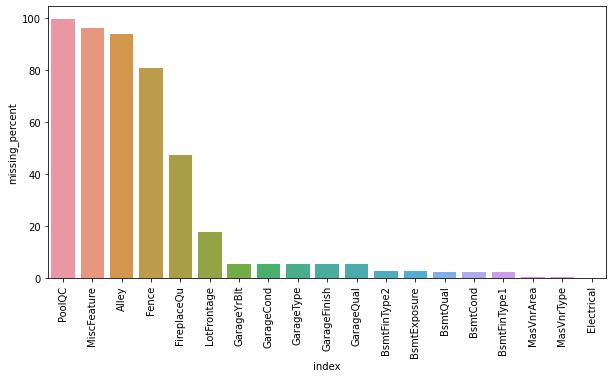

In [358]:
Null_df = Null_df[Null_df['missing_percent'] > 0]
plt.figure(figsize = [10,5])
plt.xticks(rotation = 90)
sns.barplot(x = 'index', y = 'missing_percent', data = Null_df)
plt.show()

By Seeing the above more than 50% of data is mssing for the columns PoolIQC, MiscFeatures, Alley, Fence, FireplaceQu.So lets remove those coumns

<AxesSubplot:>

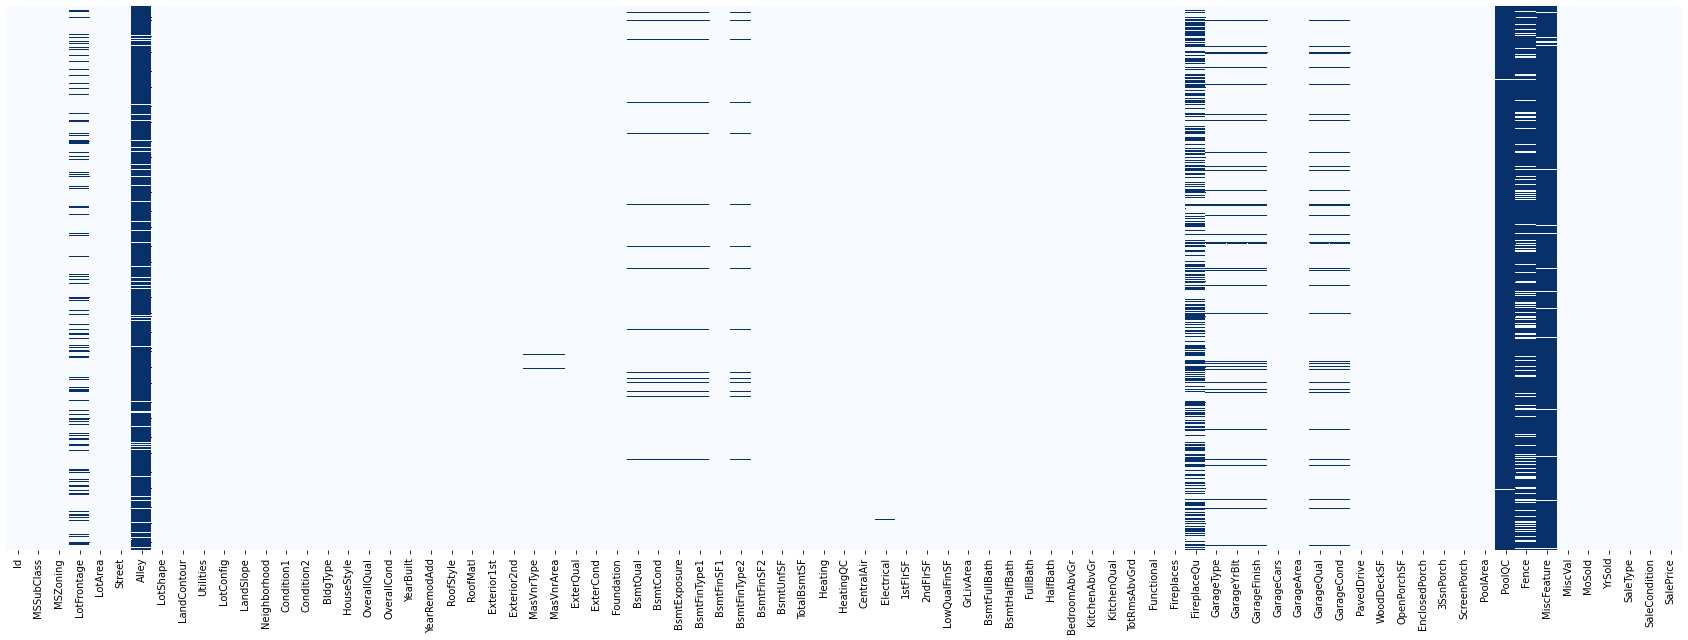

In [359]:
plt.figure(figsize = [30,10])
sns.heatmap(housing.isnull(),yticklabels=False,cbar=False,cmap='Blues')

In [360]:
#removing the columns which have more than 50% null values
housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis = 1, inplace = True)

In [361]:
#List of categorical features gaving null values
Null_category = ['GarageYrBlt','GarageCond','GarageType','GarageFinish',
                 'GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType','Electrical']

In [362]:
#Imputing the null values with mode value for the categorical column
for item in Null_category:
    housing[item] = housing[item].fillna(housing[item].mode()[0])

In [363]:
# Checking for null values
Null_df = descr(housing)
Null_df.reset_index(level=[0],inplace =True)
Null_df.sort_values(by='missing_percent', ascending=False, inplace = True)
Null_df[Null_df.missing_percent > 0]

,index,missing_percent
3,LotFrontage,17.739726
25,MasVnrArea,0.547945


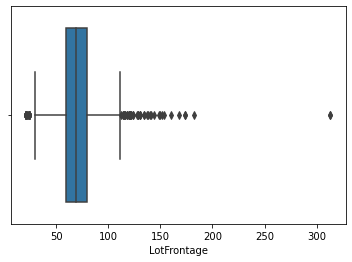

In [364]:
#Distribution of LotFrontage
sns.boxplot(housing.LotFrontage)
plt.show()

In [365]:
#Imputing the null values with the median as the feature LotFrontage has outliers
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing.LotFrontage.median())

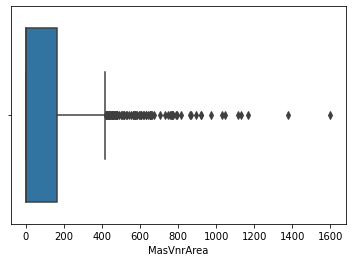

In [366]:
#Distribution of MasVnrArea
sns.boxplot(housing.MasVnrArea)
plt.show()

In [367]:
#Imputing the null values with the median as the feature MasVnrArea has outliers
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(housing.MasVnrArea.median())

In [368]:
#Checking for Null values
Null_df = descr(housing)
Null_df.reset_index(level=[0],inplace =True)
Null_df.sort_values(by='missing_percent', ascending=False, inplace = True)
Null_df[Null_df.missing_percent > 0]

,index,missing_percent


<AxesSubplot:>

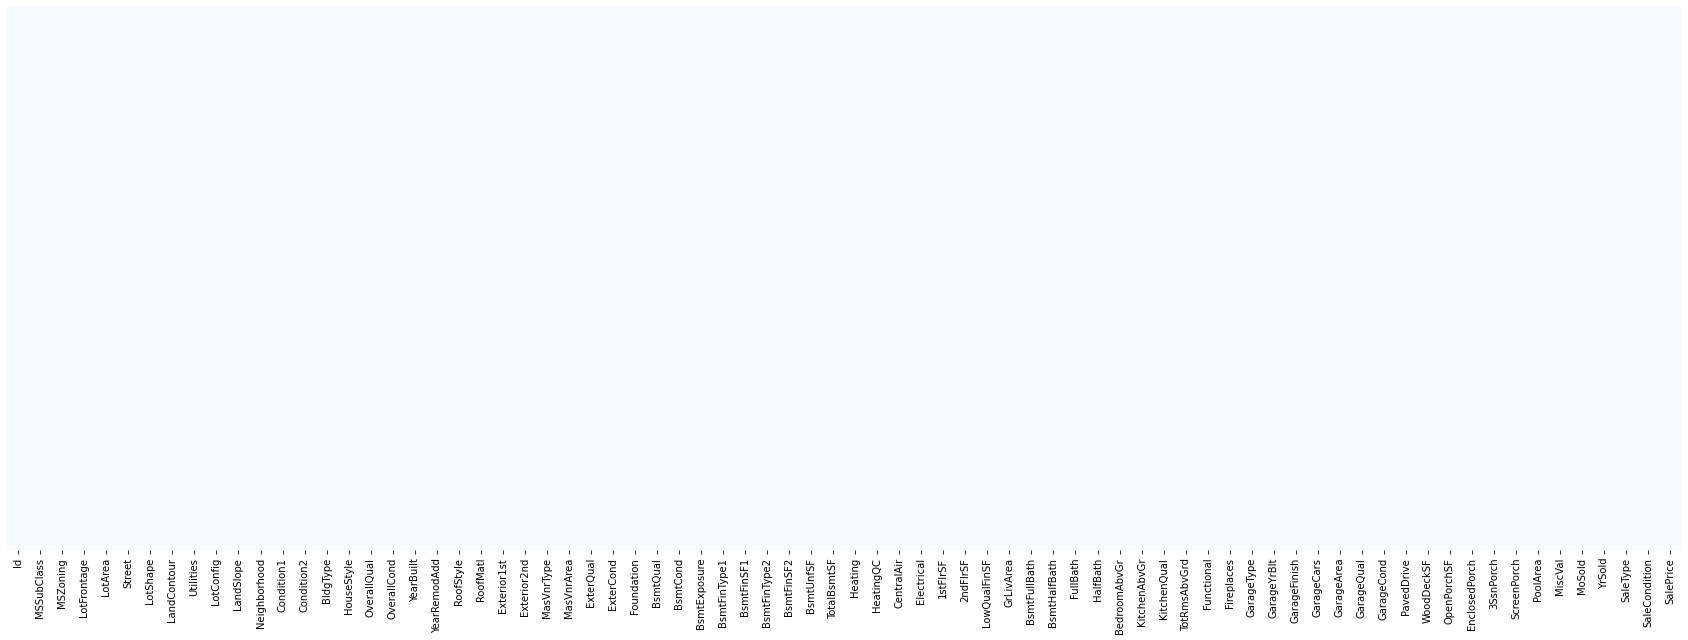

In [369]:
plt.figure(figsize = [30,10])
sns.heatmap(housing.isnull(),yticklabels=False,cbar=False,cmap='Blues')

# Exploratory Data Analysis

In [370]:
Cont_columns = []
Category_columns = []

In [371]:
for item in housing.columns.tolist():
    if housing[item].nunique() <= 25:
        Category_columns.append(item)
    else:
        Cont_columns.append(item)

In [372]:
Cont_columns.remove('SalePrice')
Cont_columns.remove('Id')

## Univariate analysis for Numeric variables

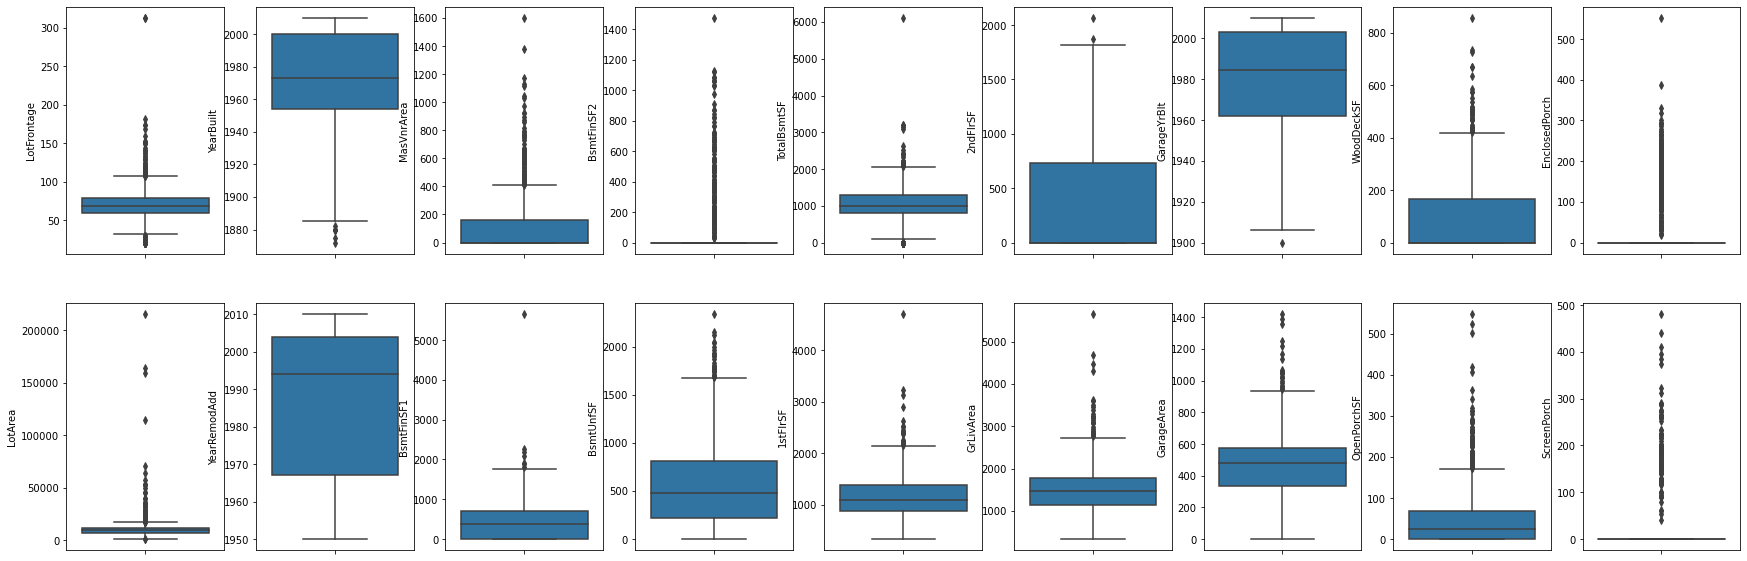

In [373]:

f, axes = plt.subplots(2,9 , figsize=(30, 10), sharex = False)
for i,item in enumerate(Cont_columns):
    sns.boxplot(y = housing[item],ax=axes[i%2, i//2]) 

## Univariate analysis for Categorical variables

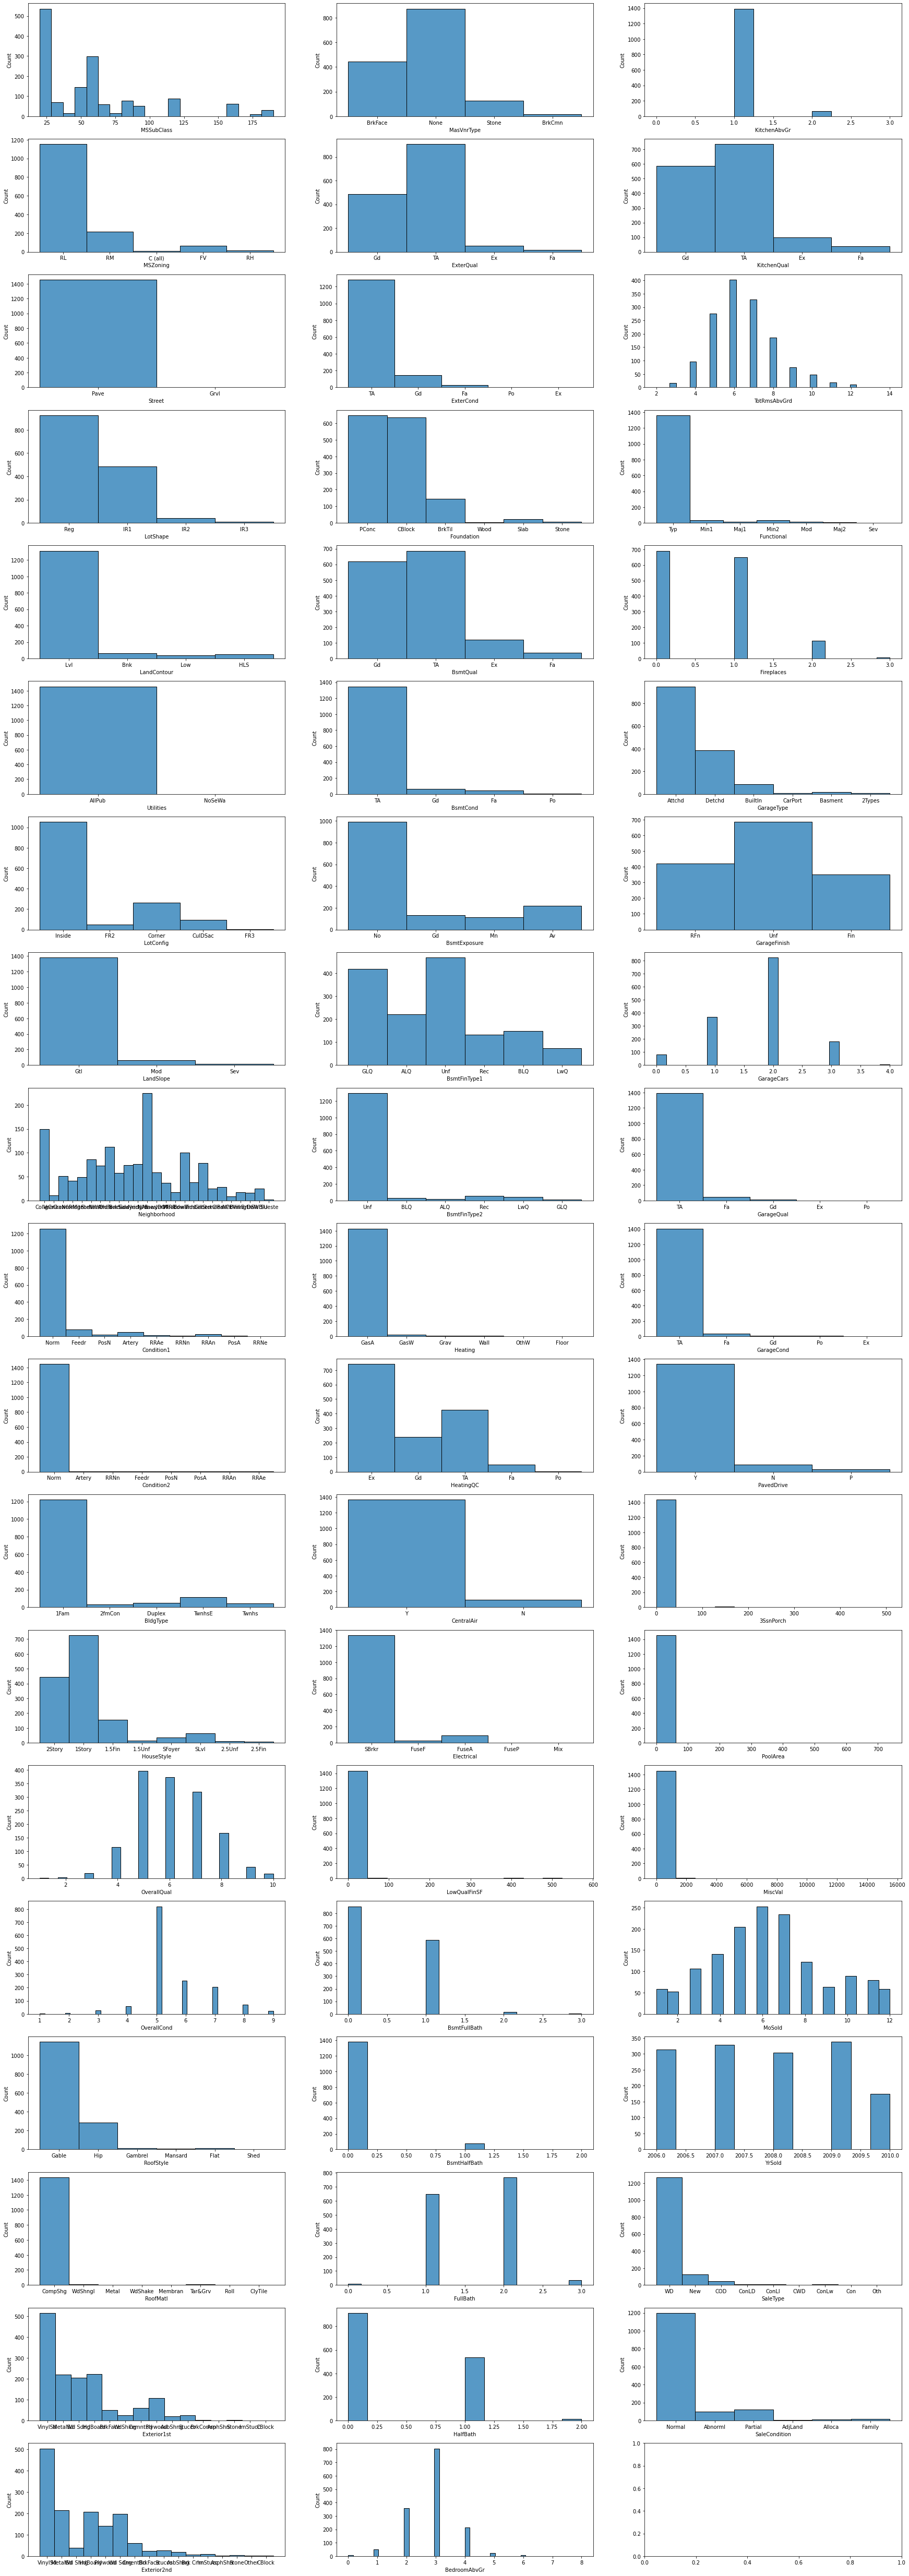

In [374]:
f, axes = plt.subplots(19,3 , figsize=(30, 90), sharex = False)
for i,item in enumerate(Category_columns):
    sns.histplot(x = housing[item],ax=axes[i%19, i//19]) 

## Bivariate Analysis (Comparing SalePrice with Numeric features)

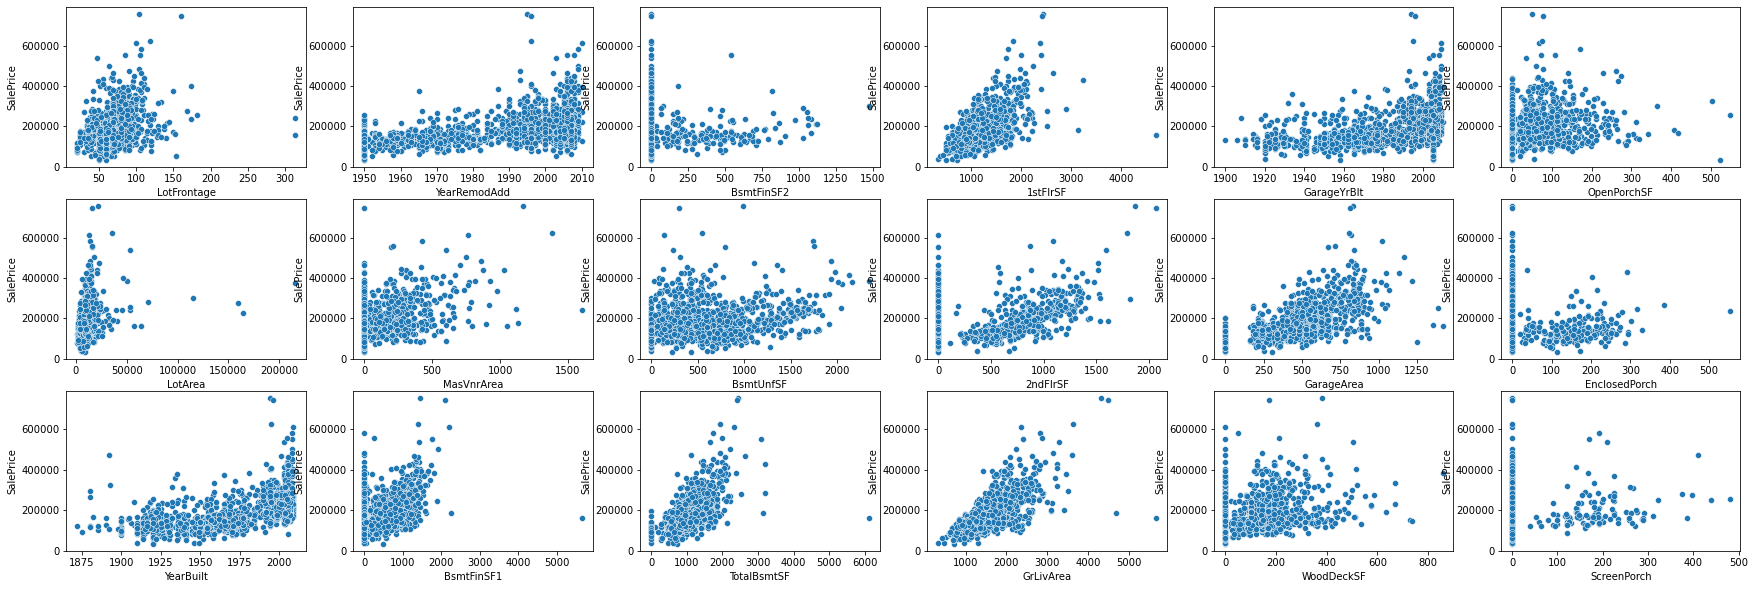

In [375]:
f, axes = plt.subplots(3,6 , figsize=(30, 10), sharex = False)
for i,item in enumerate(Cont_columns):
    sns.scatterplot(x = housing[item], y = housing.SalePrice,ax=axes[i%3, i//3]) 

## Bivariate Analysis (Comparing SalePrice with Categorical features)

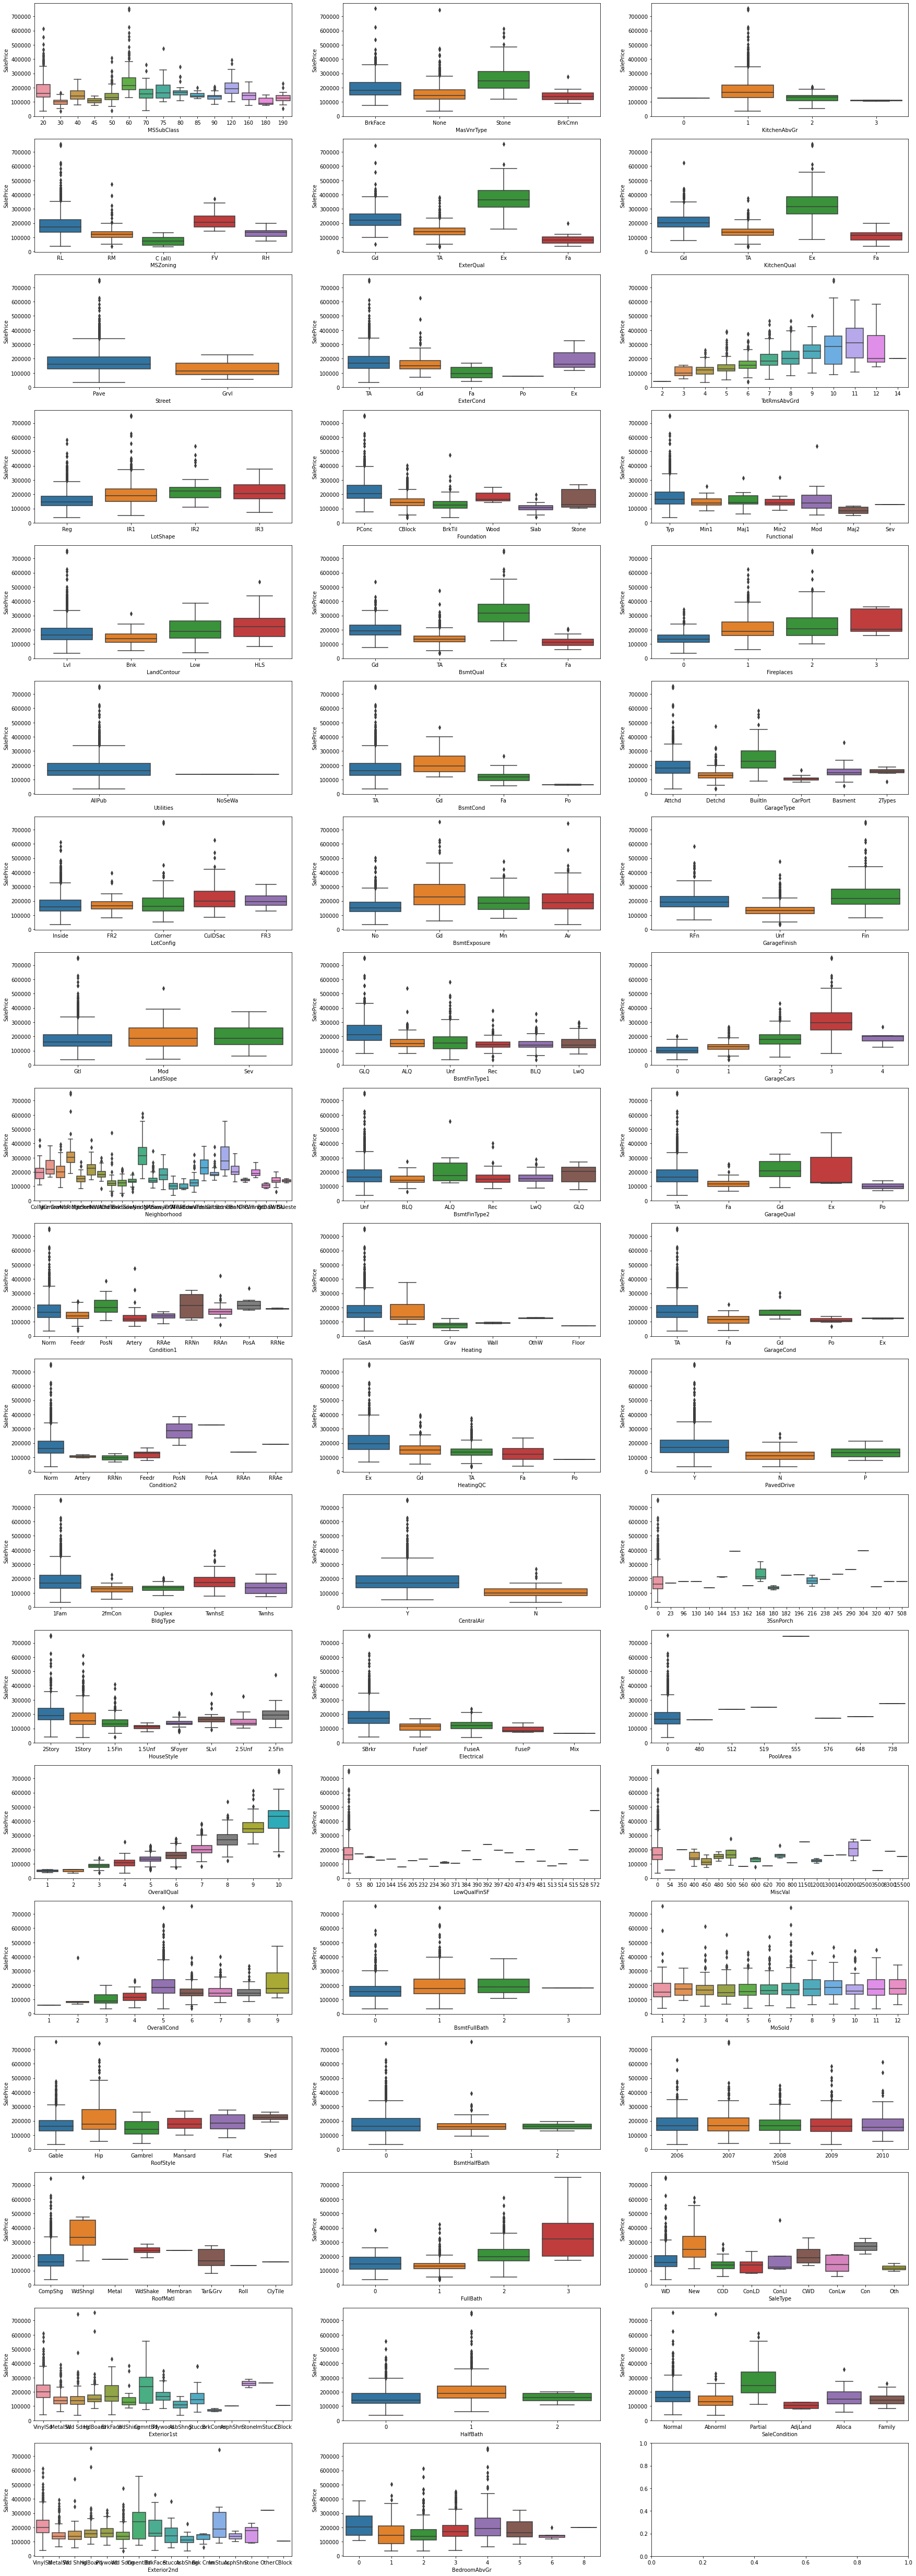

In [376]:
f, axes = plt.subplots(19,3 , figsize=(30, 90), sharex = False)
for i,item in enumerate(Category_columns):
    sns.boxplot(x = housing[item], y = housing.SalePrice,ax=axes[i%19, i//19]) 

# Data Preparation

On observation few features can be converted to numeric type which are string type. See below example<br>
Example: For garage condition feature those observations can be mapped with numbers<br>
5 -> Ex (Excellen<br>
4 -> Gd (Good)<br>
3 -> TA (Typical/Average)<br>
2 -> Fa (Fair)<br>
1 -> Po (Poor)<br>
0 -> NA (No Garage)<br>

In this similar way mapping is done to other variables as well

In [377]:
Rating = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0}
mapping_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']
for feature in mapping_features:
    housing[feature] = housing[feature].map(Rating)

In [378]:
housing[mapping_features].sample(10)

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
1078,4,3,4,3,5,4,3,3
1432,3,3,3,3,3,3,2,2
1280,4,3,4,3,5,4,3,3
867,3,3,3,3,3,2,3,3
591,5,3,5,3,5,5,3,3
910,3,3,3,3,3,3,3,3
1293,3,3,4,3,3,3,3,3
1183,3,3,3,3,5,3,3,3
651,3,3,3,3,3,3,2,1
988,3,3,3,3,3,4,3,3


In [379]:
finish_type = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
housing.BsmtFinType1 = housing.BsmtFinType1.map(finish_type)
housing.BsmtFinType2 = housing.BsmtFinType2.map(finish_type)

In [380]:
housing[['BsmtFinType1','BsmtFinType2']].sample(10)

,BsmtFinType1,BsmtFinType2
255,1,1
417,4,1
951,4,1
1135,1,1
141,6,1
142,3,1
500,4,1
768,6,1
99,5,1
1061,1,1


In [381]:
housing.CentralAir = housing.CentralAir.map({'N':0,'Y':1})
housing.CentralAir

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [382]:
housing.BsmtExposure = housing.BsmtExposure.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
housing.BsmtExposure

0       1
1       4
2       2
3       1
4       3
       ..
1455    1
1456    1
1457    1
1458    2
1459    1
Name: BsmtExposure, Length: 1460, dtype: int64

In [383]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In Given data there are four features with years in it. lets look how those feature effect the sales price of the house

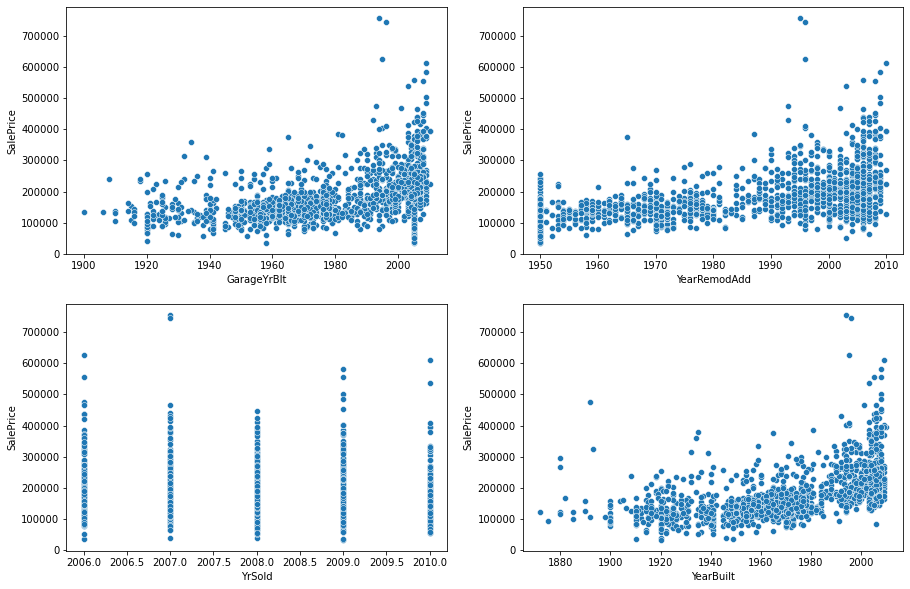

In [384]:
Year_feature = ['GarageYrBlt','YrSold','YearRemodAdd','YearBuilt']
f, axes = plt.subplots(2,2 , figsize=(15, 10), sharex = False)
for i,year_type in enumerate(Year_feature):
    sns.scatterplot(x = housing[year_type], y = housing.SalePrice,ax=axes[i%2, i//2])

Lets replace those years with total age

In [385]:
housing['House_Age'] = housing.YrSold - housing.YearBuilt

<AxesSubplot:xlabel='House_Age', ylabel='SalePrice'>

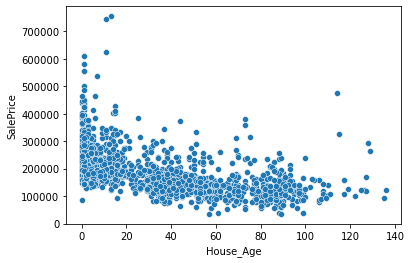

In [386]:
sns.scatterplot(housing.House_Age,housing.SalePrice)

We can see there is non-linear relationship between the Saleprice and house age

<AxesSubplot:xlabel='Garage_Age', ylabel='SalePrice'>

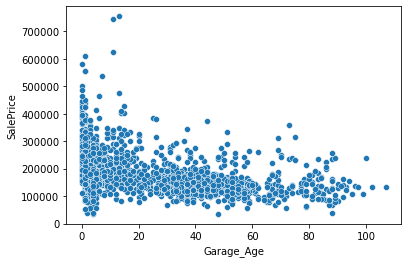

In [387]:
#Lets create a new feature 'Garage Age'
housing['Garage_Age'] = housing.YrSold - housing.GarageYrBlt
sns.scatterplot(housing.Garage_Age,housing.SalePrice)

In [388]:
#dropping the remaining variablese
housing.drop(['GarageYrBlt','YrSold','YearRemodAdd','YearBuilt','Id'], axis = 1, inplace = True)

In [389]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

By seeing the above data there are some categorical features which we need convert them to numeric type by creating the dummy variables

In [390]:
housing.MSSubClass = housing.MSSubClass.astype(str)

In [391]:
Categorical_features = housing.select_dtypes(object).columns.tolist()
Numerical_features = housing.select_dtypes(np.number ).columns.tolist()
print(Categorical_features)
print('-'*100)
print(Numerical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']
----------------------------------------------------------------------------------------------------
['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'Enclose

In [392]:
Dummy_features = pd.get_dummies(housing[Categorical_features], drop_first = True)
Dummy_features.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [393]:
housing_master = pd.concat([housing, Dummy_features], axis = 1)
housing_master = housing_master.drop(['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities',
                                       'LotConfig','LandSlope','Neighborhood','Condition1',
                                       'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                       'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating',
                                       'Electrical','Functional','GarageType','GarageFinish','PavedDrive',
                                       'SaleType','SaleCondition'], axis = 1)

In [394]:
housing_master.shape

(1460, 214)

In [395]:
housing.SalePrice = housing.SalePrice.apply(np.log)

In [396]:
#Splitting the data into train and test
Train , Test = train_test_split(housing_master, train_size=0.8, test_size=0.2, random_state=100)

# Feature Scaling

In [397]:
scaler = MinMaxScaler()

Train[Numerical_features] = scaler.fit_transform(Train[Numerical_features])
Test[Numerical_features] = scaler.transform(Test[Numerical_features])

In [398]:
Train.shape

(1168, 214)

In [399]:
Train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.167002,0.042887,0.566495,0.571811,0.064654,0.465753,0.363014,0.520263,0.669235,0.222317,...,0.003425,0.003425,0.079623,0.002568,0.871575,0.002568,0.008562,0.014555,0.824486,0.079623
std,0.074365,0.045996,0.153514,0.138153,0.114770,0.190629,0.115758,0.228770,0.097053,0.346834,...,0.058445,0.058445,0.270825,0.050637,0.334705,0.050637,0.092172,0.119813,0.380569,0.270825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028979,0.444444,0.500000,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038538,0.555556,0.500000,0.000000,0.333333,0.333333,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.100000,0.666667,0.333333,0.666667,0.666667,0.333333,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [400]:
Train.sample(10)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
928,0.164384,0.049256,0.777778,0.500,0.000000,0.666667,0.333333,0.666667,0.666667,0.666667,...,0,0,0,0,1,0,0,0,1,0
696,0.099315,0.021968,0.444444,0.750,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
1015,0.167808,0.033186,0.777778,0.625,0.000000,0.666667,0.333333,0.666667,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
821,0.133562,0.021968,0.333333,0.375,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
837,0.000000,0.001776,0.555556,0.500,0.098750,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
657,0.133562,0.027577,0.666667,0.625,0.000000,0.333333,0.000000,0.666667,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
72,0.181507,0.041324,0.666667,0.500,0.025000,0.333333,0.333333,0.666667,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
706,0.164384,0.532141,0.666667,0.500,0.219375,0.333333,0.333333,0.666667,0.666667,1.000000,...,0,0,0,0,1,0,0,0,1,0
818,0.202055,0.035131,0.555556,0.750,0.050000,0.333333,0.333333,0.333333,0.666667,0.666667,...,0,0,0,0,1,0,0,0,1,0
537,0.164384,0.053448,0.333333,0.500,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,0,0,0,0,1,0


In [401]:
X_train = Train.drop('SalePrice',axis = 1)
y_train = Train.SalePrice

In [402]:
X_test = Test.drop('SalePrice',axis = 1)
y_test = Test.SalePrice

In [403]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Columns: 213 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(45), uint8(168)
memory usage: 611.4 KB


In [404]:
y_train

133     0.257048
290     0.275420
24      0.165394
1093    0.154284
1288    0.337592
          ...   
802     0.213998
53      0.486182
350     0.393225
79      0.104291
792     0.326191
Name: SalePrice, Length: 1168, dtype: float64

## Feature selection using RFE

In [405]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 107)
ref = rfe.fit(X_train, y_train)

In [406]:
col = X_train.columns[rfe.support_]

In [407]:
X_train_rfe = X_train[col]
X_train_rfe.shape

(1168, 107)

In [408]:
lr_rfe = LinearRegression()
lr_rfe.fit(X_train_rfe, y_train)

LinearRegression()

In [409]:
r2_score(y_train, lr_rfe.predict(X_train_rfe))

0.8856225991078664

In [410]:
def Metrics(y , y_pred):
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
    rss = np.sum(np.square(y - y_pred))
    print('rss',round(rss,3))
    mse = mean_squared_error(y, y_pred)
    print('mse',round(mse,3))
# Root Mean Squared Error
    rmse = mse**0.5
    print('rmse',round(rmse,3))

In [411]:
Metrics(y_train,lr_rfe.predict(X_train_rfe))

rss 1.617
mse 0.001
rmse 0.037


# Ridge Regression

In [412]:
from sklearn.linear_model import Ridge

In [413]:

ridge = Ridge(alpha=0.001)

ridge.fit(X_train_rfe,y_train)

y_train_pred = ridge.predict(X_train_rfe)

print(r2_score(y_train,y_train_pred))

0.9219634874920599


In [414]:
r2_score(y_test, ridge.predict(X_test[col]))

0.7888631277866845

# Parametric tuning in Ridge Regression

In [415]:
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha':[0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [416]:
from sklearn.model_selection import GridSearchCV
grid_search_ridge = GridSearchCV(estimator = ridge,
                           param_grid = params,
                          n_jobs = -1,
                           verbose = 1,
                           scoring = 'neg_mean_absolute_error')


In [417]:
%%time
grid_search_ridge.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 2.03 s


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.9s finished


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [418]:
Ridge_model = grid_search_ridge.best_estimator_
Ridge_model

Ridge(alpha=0.1)

In [419]:
Coeffients = pd.DataFrame({
    'Varname': X_train_rfe.columns,
    'Coeffients': Ridge_model.coef_
})
Coeffients['Absolute_Coeffient'] = Coeffients['Coeffients'].apply(lambda x : abs(x))
#Top ten paramets which affect the SalePrice
Coeffients.sort_values(by = 'Absolute_Coeffient',ascending = False).head(10)

,Varname,Coeffients,Absolute_Coeffient
68,RoofMatl_WdShngl,0.532429,0.532429
53,Condition2_PosN,-0.494629,0.494629
63,RoofMatl_Membran,0.473180,0.473180
62,RoofMatl_CompShg,0.451556,0.451556
66,RoofMatl_Tar&Grv,0.450054,0.450054
64,RoofMatl_Metal,0.413864,0.413864
65,RoofMatl_Roll,0.395613,0.395613
67,RoofMatl_WdShake,0.381152,0.381152
15,GrLivArea,0.195573,0.195573
12,1stFlrSF,0.171416,0.171416


In [420]:
#train score
r2_score(y_train,Ridge_model.predict(X_train_rfe))

0.9084032155978022

In [421]:
#R2 score for test data
round(r2_score(y_test,Ridge_model.predict(X_test[col])),3)

0.831

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

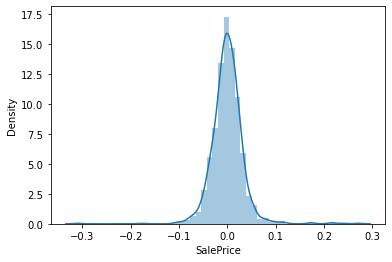

In [422]:
#Checking linear regression assumptions
sns.distplot(y_train-Ridge_model.predict(X_train_rfe))

# Lasso Regression

In [423]:
from sklearn.linear_model import Lasso
lasso = Lasso(0.001)

In [424]:
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.001)

In [425]:
#train score
r2_score(y_train,lasso.predict(X_train_rfe))

0.8084152788954456

In [426]:
#test score
r2_score(y_test,lasso.predict(X_test[col]))

0.8261722126232287

# Hyperparameter Tuning for lasso regression

In [427]:
from sklearn.model_selection import GridSearchCV
Lasso = Lasso()

In [428]:
params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search_lasso = GridSearchCV(estimator = Lasso,
                           param_grid = params,
                          n_jobs = -1,
                           verbose = 1,
                           scoring = 'neg_mean_absolute_error')

In [429]:
%%time
grid_search_lasso.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Wall time: 106 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_absolute_error', verbose=1)

In [430]:
lasso_model = grid_search_lasso.best_estimator_
lasso_model

Lasso(alpha=0.001)

In [431]:
Coeffients_lasso = pd.DataFrame({
    'Varname': X_train_rfe.columns,
    'Coeffients': lasso_model.coef_
})
Coeffients_lasso['Absolute_Coeffient'] = Coeffients_lasso['Coeffients'].apply(lambda x : abs(x))
#Top ten paramets which affect the SalePrice
Coeffients_lasso.sort_values(by = 'Absolute_Coeffient',ascending = False).head(10)

,Varname,Coeffients,Absolute_Coeffient
15,GrLivArea,0.256063,0.256063
2,OverallQual,0.186144,0.186144
18,KitchenQual,0.060929,0.060929
45,Neighborhood_NoRidge,0.058592,0.058592
20,GarageCars,0.053914,0.053914
5,ExterQual,0.043965,0.043965
46,Neighborhood_NridgHt,0.043319,0.043319
7,BsmtExposure,0.043200,0.043200
26,MSSubClass_20,0.019788,0.019788
103,SaleType_New,0.015702,0.015702


In [432]:
#train score
r2_score(y_train,lasso_model.predict(X_train_rfe))

0.8084152788954456

In [433]:
#R2 score for test data
round(r2_score(y_test,lasso_model.predict(X_test[col])),3)

0.826

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

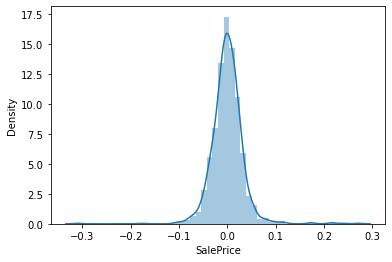

In [434]:
#Checking linear regression assumptions
sns.distplot(y_train-Ridge_model.predict(X_train_rfe))

# Conclusion

## 1. Ridge Regression<br>
- R2 Score on Train Data is 0.90<br>
- R2 Score on Test Data is 0.83<br>
- Optimal Value of Alpha is 0.1<br>

## 2. Lasso Regression

- R2 Score on Train Data is 0.80<br>
- R2 Score on Test Data is 0.82<br>
- Optimal Value of Alpha is 0.001<br>

# Subjective Questions

### Question 1<br>

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [435]:
#Ridge regression with alpha 0.2
from sklearn.linear_model import Ridge
Ridge_2 = Ridge(alpha = 0.2)

In [436]:
Ridge_2.fit(X_train_rfe,y_train)

Ridge(alpha=0.2)

In [437]:
#train score
r2_score(y_train,Ridge_2.predict(X_train_rfe))

0.899460128149525

In [438]:
#R2 score for test data
round(r2_score(y_test,Ridge_2.predict(X_test[col])),3)

0.845

In [439]:
#Error for test data
Metrics(y_test,lasso_model.predict(X_test[col]))

rss 0.629
mse 0.002
rmse 0.046


In [440]:
Coeffients_Ridge_2 = pd.DataFrame({
    'Varname': X_train_rfe.columns,
    'Coeffients': Ridge_2.coef_
})
Coeffients_Ridge_2['Absolute_Coeffient'] = Coeffients_Ridge_2['Coeffients'].apply(lambda x : abs(x))
#Top ten paramets which affect the SalePrice
Coeffients_Ridge_2.sort_values(by = 'Absolute_Coeffient',ascending = False).head(10)

,Varname,Coeffients,Absolute_Coeffient
53,Condition2_PosN,-0.431852,0.431852
68,RoofMatl_WdShngl,0.375927,0.375927
63,RoofMatl_Membran,0.296394,0.296394
62,RoofMatl_CompShg,0.294548,0.294548
66,RoofMatl_Tar&Grv,0.288751,0.288751
64,RoofMatl_Metal,0.247240,0.247240
65,RoofMatl_Roll,0.234142,0.234142
67,RoofMatl_WdShake,0.230482,0.230482
15,GrLivArea,0.186163,0.186163
12,1stFlrSF,0.161256,0.161256


In [441]:
from sklearn.linear_model import Lasso
lasso_2 = Lasso(0.002)

In [442]:
lasso_2.fit(X_train_rfe,y_train)

Lasso(alpha=0.002)

In [443]:
#train score
r2_score(y_train,lasso_2.predict(X_train_rfe))

0.768407990131081

In [444]:
#R2 score for test data
round(r2_score(y_test,lasso_2.predict(X_test[col])),3)

0.782

In [445]:
#Error for test data
Metrics(y_test,lasso_model.predict(X_test[col]))

rss 0.629
mse 0.002
rmse 0.046


In [446]:
Coeffients_lasso_2 = pd.DataFrame({
    'Varname': X_train_rfe.columns,
    'Coeffients': lasso_2.coef_
})
Coeffients_lasso_2['Absolute_Coeffient'] = Coeffients_lasso_2['Coeffients'].apply(lambda x : abs(x))
#Top ten paramets which affect the SalePrice
Coeffients_lasso_2.sort_values(by = 'Absolute_Coeffient',ascending = False).head(10)

,Varname,Coeffients,Absolute_Coeffient
2,OverallQual,0.194052,0.194052
15,GrLivArea,0.128047,0.128047
18,KitchenQual,0.067094,0.067094
20,GarageCars,0.054635,0.054635
5,ExterQual,0.045046,0.045046
45,Neighborhood_NoRidge,0.040936,0.040936
7,BsmtExposure,0.040128,0.040128
46,Neighborhood_NridgHt,0.028036,0.028036
19,TotRmsAbvGrd,0.022663,0.022663
29,MSSubClass_60,0.016699,0.016699


### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [447]:
Df = X_train_rfe.drop(['GrLivArea','OverallQual','KitchenQual','GarageCars'],axis = 1)
Df.shape

(1168, 103)

In [448]:
from sklearn.model_selection import GridSearchCV
Lasso_3 = Lasso(0.001)

In [449]:
Lasso_3.fit(Df,y_train)

Lasso(alpha=0.001)

In [450]:
#train score
r2_score(y_train,Lasso_3.predict(Df))

0.775677653212627

In [451]:
Coeffients_Lasso_3 = pd.DataFrame({
    'Varname': Df.columns,
    'Coeffients': Lasso_3.coef_
})
Coeffients_Lasso_3['Absolute_Coeffient'] = Coeffients_Lasso_3['Coeffients'].apply(lambda x : abs(x))
#Top ten paramets which affect the SalePrice
Coeffients_Lasso_3.sort_values(by = 'Absolute_Coeffient',ascending = False).head(10)

,Varname,Coeffients,Absolute_Coeffient
11,1stFlrSF,0.308182,0.308182
4,ExterQual,0.147075,0.147075
12,2ndFlrSF,0.122068,0.122068
41,Neighborhood_NoRidge,0.064939,0.064939
42,Neighborhood_NridgHt,0.060181,0.060181
6,BsmtExposure,0.051958,0.051958
20,House_Age,-0.038589,0.038589
16,TotRmsAbvGrd,0.031193,0.031193
38,Neighborhood_Crawfor,0.025186,0.025186
22,MSSubClass_20,0.019308,0.019308
